|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [22]:
import pandas as pd
import numpy as np

import missingno as msno

from matplotlib import pyplot as plt

In [23]:
df_customer = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599328/customer_detail.csv")
df_order = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599329/order_detail.csv")
df_payment = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599330/payment_detail.csv")
df_sku = pd.read_csv("https://github.com/clarentcelsia/Analytics/files/13599331/sku_detail.csv")

In [24]:
df_customer.head(5)

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


Text(0.5, 0, 'sku')

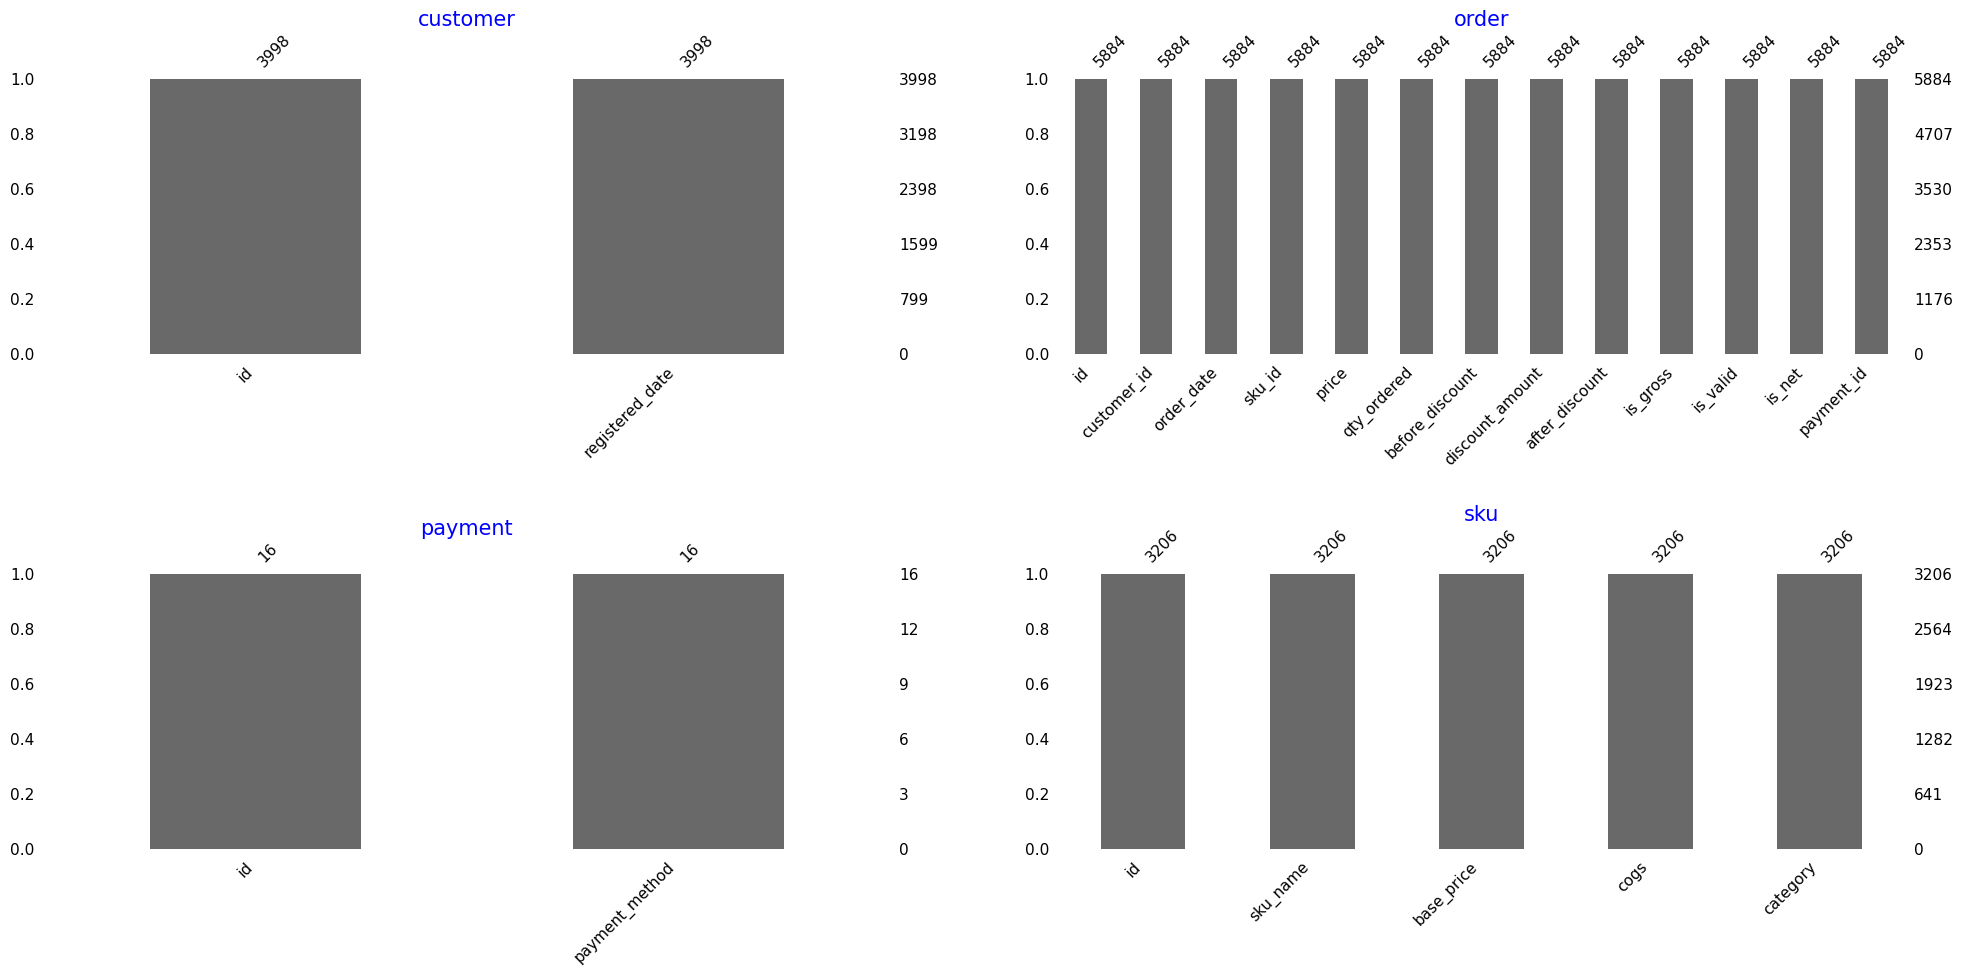

In [25]:
# Check nan
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=.8)
fig.add_subplot(2, 2, 1)
msno.bar(df_customer, fontsize=11)
plt.xlabel("customer", fontdict={'size':15, 'color':'b'})
fig.add_subplot(2,2,2)
msno.bar(df_order, fontsize=11)
plt.xlabel("order", fontdict={'size':15,'color':'b'})
fig.add_subplot(2,2,3)
msno.bar(df_payment, fontsize=11)
plt.xlabel("payment", fontdict={'size':15,'color':'b'})
fig.add_subplot(2,2,4)
msno.bar(df_sku, fontsize=11)
plt.xlabel("sku", fontdict={'size':15,'color':'b'})


<p>Figure above shown no nan data.</p>

In [26]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3998 non-null   object
 1   registered_date  3998 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [27]:
df_customer['registered_date'] = df_customer.registered_date.astype('datetime64[ns]')

In [29]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_id           5884 non-null   object 
 4   price            5884 non-null   int64  
 5   qty_ordered      5884 non-null   int64  
 6   before_discount  5884 non-null   float64
 7   discount_amount  5884 non-null   float64
 8   after_discount   5884 non-null   float64
 9   is_gross         5884 non-null   int64  
 10  is_valid         5884 non-null   int64  
 11  is_net           5884 non-null   int64  
 12  payment_id       5884 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 597.7+ KB


In [30]:
df_order['order_date'] = df_order.order_date.astype('datetime64[ns]')

In [31]:
filtered_cols = df_order.select_dtypes(include=['int64', 'float64']).columns
filtered_cols = filtered_cols[~filtered_cols.isin(['is_gross', 'is_valid','is_net', 'payment_id'])]
df_order.loc[:, filtered_cols].describe().round(2)

,price,qty_ordered,before_discount,discount_amount,after_discount
count,5884.00,5884.00,5.884000e+03,5884.00,5.884000e+03
mean,1062335.60,2.30,1.477429e+06,5750.23,1.471679e+06
std,1929349.42,19.83,1.001996e+07,68578.54,1.001861e+07
min,0.00,1.00,0.000000e+00,-34771.00,0.000000e+00
25%,63510.00,1.00,9.280000e+04,0.00,9.274200e+04
50%,203000.00,1.00,2.445280e+05,0.00,2.436000e+05
75%,1017900.00,1.00,1.247000e+06,0.00,1.222785e+06
max,27782000.00,1000.00,5.187520e+08,2610000.00,5.187520e+08


In [32]:
df_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3206 non-null   object 
 1   sku_name    3206 non-null   object 
 2   base_price  3206 non-null   float64
 3   cogs        3206 non-null   int64  
 4   category    3206 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 125.4+ KB


In [33]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16 non-null     int64 
 1   payment_method  16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [34]:
# Check duplicate
print("customer_duplicate :", df_customer.duplicated(subset='id').sum())
print("sku_duplicate :", df_sku.duplicated(subset='id').sum())
print("payment_duplicate :", df_payment.duplicated(subset='id').sum())
# I allowed duplication in order_detail since 1 transaction id can have multiple order items.

customer_duplicate : 0
sku_duplicate : 0
payment_duplicate : 0


### SQL

In [35]:
from sqlite3 import connect

In [36]:
conn = connect(':memory:')

In [37]:
df_customer.to_sql(con=conn, index=False, if_exists='replace', name='customer_detail')
df_order.to_sql(con=conn, index=False, if_exists='replace', name='order_detail')
df_sku.to_sql(con=conn, index=False, if_exists='replace', name='sku_detail')
df_payment.to_sql(con=conn, index=False, if_exists='replace', name='payment_detail')

16

In [48]:
df = pd.read_sql("""
SELECT 
    cd.registered_date, od.customer_id, od.order_date, sk.sku_name, sk.category,
    sk.cogs, od.price, od.qty_ordered, od.before_discount, od.discount_amount, od.after_discount,
    od.is_gross, od.is_valid, od.is_net, pd.payment_method
FROM order_detail od
LEFT JOIN customer_detail cd ON cd.id = od.customer_id
LEFT JOIN sku_detail sk ON sk.id = od.sku_id
LEFT JOIN payment_detail pd ON pd.id = od.payment_id
""", conn)

In [49]:
display(df.head(5))
df.shape

,registered_date,customer_id,order_date,sku_name,category,cogs,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_method
0,2021-07-07 00:00:00,C713589L,2021-11-19 00:00:00,RB_Dettol Germ Busting Kit-bf,Others,18270,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,jazzwallet
1,2021-11-20 00:00:00,C551551L,2021-11-19 00:00:00,PS4_Slim-500GB,Entertainment,1321182,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,jazzwallet
2,2021-11-19 00:00:00,C685596L,2021-11-25 00:00:00,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,Entertainment,5162580,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,Payaxis
3,2021-11-03 00:00:00,C830683L,2021-11-22 00:00:00,dawlance_Inverter 30,Appliances,3054628,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,jazzwallet
4,2021-07-05 00:00:00,C191766L,2021-11-21 00:00:00,Dawlance_Inverter-45 2.0 ton,Appliances,3177472,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,Payaxis


(5884, 15)

In [47]:
df.isna().sum()

cast(cd.registered_date as timestamp)    0
customer_id                              0
cast(od.order_date as timestamp)         0
sku_name                                 0
category                                 0
cogs                                     0
price                                    0
qty_ordered                              0
before_discount                          0
discount_amount                          0
after_discount                           0
is_gross                                 0
is_valid                                 0
is_net                                   0
payment_method                           0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   registered_date  5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_name         5884 non-null   object 
 4   category         5884 non-null   object 
 5   cogs             5884 non-null   int64  
 6   price            5884 non-null   int64  
 7   qty_ordered      5884 non-null   int64  
 8   before_discount  5884 non-null   float64
 9   discount_amount  5884 non-null   float64
 10  after_discount   5884 non-null   float64
 11  is_gross         5884 non-null   int64  
 12  is_valid         5884 non-null   int64  
 13  is_net           5884 non-null   int64  
 14  payment_method   5884 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 689.7+ KB


In [50]:
date_maps = {
    'registered_date':'datetime64[ns]',
    'order_date':'datetime64[ns]'
}
df = df.astype(date_maps)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   registered_date  5884 non-null   datetime64[ns]
 1   customer_id      5884 non-null   object        
 2   order_date       5884 non-null   datetime64[ns]
 3   sku_name         5884 non-null   object        
 4   category         5884 non-null   object        
 5   cogs             5884 non-null   int64         
 6   price            5884 non-null   int64         
 7   qty_ordered      5884 non-null   int64         
 8   before_discount  5884 non-null   float64       
 9   discount_amount  5884 non-null   float64       
 10  after_discount   5884 non-null   float64       
 11  is_gross         5884 non-null   int64         
 12  is_valid         5884 non-null   int64         
 13  is_net           5884 non-null   int64         
 14  payment_method   5884 non-null   object 

In [77]:
list_items = []

filtered = df.select_dtypes('object').columns
filtered = filtered[~filtered.isin(['customer_id', 'sku_name'])]
for col in df.loc[:, filtered].columns:
    list_items.append([col, df[col].dtypes, df[col].nunique(), df[col].unique()])

pd.set_option('display.max_colwidth', None)
pd.DataFrame(columns=['features', 'type', 'n unique', 'unique'], data=list_items)

,features,type,n unique,unique
0,category,object,15,"[Others, Entertainment, Appliances, Computing, Mobiles & Tablets, Superstore, Health & Sports, Women Fashion, Home & Living, Men Fashion, Beauty & Grooming, Soghaat, School & Education, Books, Kids & Baby]"
1,payment_method,object,16,"[jazzwallet, Payaxis, cod, customercredit, Easypay, jazzvoucher, easypay_voucher, Easypay_MA, ublcreditcard, mygateway, cashatdoorstep, mcblite, internetbanking, financesettlement, marketingexpense, productcredit]"


### delve into the problem

Company plans to surprise the customer with the gift based on the highest quantity of Mobile & Tablets product purchased.

In [94]:
select_cols = ['order_date', 'sku_name', 'category', 'qty_ordered', 'is_valid']
df_gift = df[select_cols]

In [101]:
pd.reset_option('all')
print('2022')
df_result = df_gift[df_gift.order_date.dt.year == 2022]\
    .query("is_valid==1 & category=='Mobiles & Tablets'")\
    .groupby(['sku_name'])['qty_ordered'].sum()

df_result.sort_values(ascending=False).head(5)

2022


sku_name
IDROID_BALRX7-Gold                1000
IDROID_BALRX7-Jet black             31
Infinix Hot 4-Gold                  15
samsung_Grand Prime Plus-Black      11
infinix_Zero 4-Grey                 10
Name: qty_ordered, dtype: int64

In [113]:
pd.read_sql(con=conn, sql=""" 
    SELECT strftime('%Y', od.order_date) as order_year,
        sk.sku_name,
        sum(od.qty_ordered) as total_qty_ordered
    FROM order_detail od
    INNER JOIN sku_detail sk ON sk.id = od.sku_id
    WHERE strftime('%Y', od.order_date) = '2022' AND od.is_valid = 1 AND sk.category = 'Mobiles & Tablets'
    GROUP BY order_year, sk.sku_name
    ORDER BY total_qty_ordered DESC
    LIMIT 5""")

,order_year,sku_name,total_qty_ordered
0,2022,IDROID_BALRX7-Gold,1000
1,2022,IDROID_BALRX7-Jet black,31
2,2022,Infinix Hot 4-Gold,15
3,2022,samsung_Grand Prime Plus-Black,11
4,2022,infinix_Zero 4-Grey,10


In [114]:
print(2021)
df_result = df_gift[df_gift.order_date.dt.year==2021]\
    .query("is_valid == 1 & category == 'Mobiles & Tablets'")\
    .groupby(['sku_name'])['qty_ordered'].sum()

df_result.sort_values(ascending=False).head(5)

2021


sku_name
iPhone SE-16GB                      16
Huawei P8 lite                      15
samsungGALAXY S-7 EDGE 32GB LTE      9
Apple iPhone 6S Plus 16GB Silver     8
Apple iPhone 6 (128GB) Gold          6
Name: qty_ordered, dtype: int64